## Numerische Lösung gewöhnlicher Differentialgleichungen

Vorlesung PTP1, Universität Heidelberg, Wintersemester 2019/20

Matthias Bartelmann

Vorbereitung, nötige Bibliotheken laden

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**Beispiel 1**: Differentialgleichung des radioaktiven Zerfalls

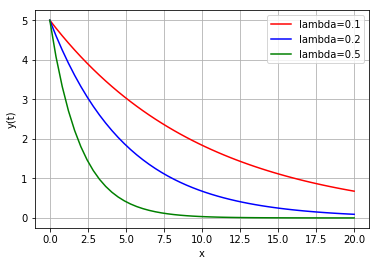

In [2]:
# Funktion, die dy/dx zurückgibt:

def dy (y, x, la):
    return -la*y

# Anfangsbedingung:

y0 = 5

# Tabelle der unabhängigen Variable:

x = np.linspace (0, 20)

# Lösungen der Differentialgleichung für drei verschiedene Werte von k:

y1 = odeint (dy, y0, x, args=(0.1,))
y2 = odeint (dy, y0, x, args=(0.2,))
y3 = odeint (dy, y0, x, args=(0.5,))

# Abbildung der Ergebnisse:

plt.plot (x, y1, "r", label="lambda=0.1")
plt.plot (x, y2, "b", label="lambda=0.2")
plt.plot (x, y3, "g", label="lambda=0.5")
plt.xlabel ("x")
plt.ylabel ("y(t)")
plt.legend (loc=0)
plt.grid (True)
plt.show ()

**Beispiel 2**: Differentialgleichungen für den Fall aus geringer Höhe mit Stokes'scher Reibung und mit Luftreibung

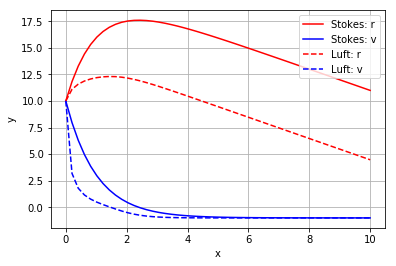

In [4]:
def dy_stokes (y, x, g, k):
    return [y[1], -g-k*y[1]]

def dy_luft (y, x, g, k):
    return [y[1], -g-k*y[1]*abs (y[1])]

y0 = [10, 10]
x = np.linspace (0, 10)
y1 = odeint (dy_stokes, y0, x, args=(1.0,1.0))
y2 = odeint (dy_luft,   y0, x, args=(1.0,1.0))

plt.plot (x, y1[:,0], "r", label="Stokes: r");
plt.plot (x, y1[:,1], "b", label="Stokes: v");
plt.plot (x, y2[:,0], "r--", label="Luft: r");
plt.plot (x, y2[:,1], "b--", label="Luft: v");
plt.xlabel ("x")
plt.ylabel ("y")
plt.legend (loc=0)
plt.grid (True)
plt.show ()

**Beispiel 3**: Eine Bernoulli'sche Differentialgleichung

Bemerkung: Bernoulli'sche Differentialgleichungen haben die Form
$$y'(x)+p(x)y(x) = r(x)y^n(x)\;.$$
Sie können durch die Substitution
$$z := y^{1-n}$$
in lineare, inhomogene Differentialgleichungen überführt werden.

Die Differentialgleichung im folgenden Beispiel lautet
$$y'(x)+\frac{y(x)}{x} = x^2y^2\;.$$
Hier sind also $n = 2$ und $z = 1/y$, also $y' = -z'/z^2$, und damit lautet die Differentialgleichung für $z$
$$z'(x)-\frac{z(x)}{x} = -x^2\;.$$

Der homogene Anteil dieser inhomogenen Differentialgleichung wird zunächst durch
$$z(x) = Ax$$
mit einer Konstante $A$ allgemein gelöst (Hinweis: Trennung der Variablen). Auf der Suche nach einer partikulären Lösung der inhomogenen Gleichung variieren wir die Konstante, $A->A(x)$, erhalten
$$z' = A'x+A$$
und, indem wir diesen Ausdruck in die inhomogene Differentialgleichung für $z$ einsetzen,
$$A'x = -x^2\;.$$
Also ist
$$A(x) = -\frac{x^2}{2}+C\;,$$
mit einer weiteren Konstante $C$, daher
$$z = -\frac{x^3}{2}+Cx$$
und schließlich
$$y(x) = \frac{1}{Cx-x^3/2}\;.$$

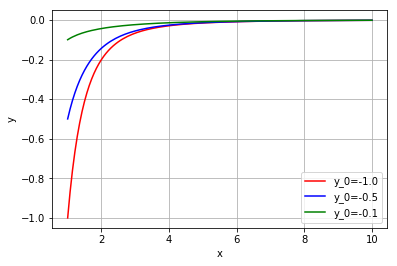

In [5]:
def dy (y, x):
    return -y/x+x*x*y*y

x = np.linspace (1, 10, 128)
y1 = odeint (dy, -1, x)
y2 = odeint (dy, -0.5, x)
y3 = odeint (dy, -0.1, x)

plt.plot (x, y1, "r", label="y_0=-1.0");
plt.plot (x, y2, "b", label="y_0=-0.5");
plt.plot (x, y3, "g", label="y_0=-0.1");
plt.xlabel ("x")
plt.ylabel ("y")
plt.legend (loc=0)
plt.grid (True)
plt.show ()

**Beispiel 4**: Fall aus großer Höhe mit Luftreibung

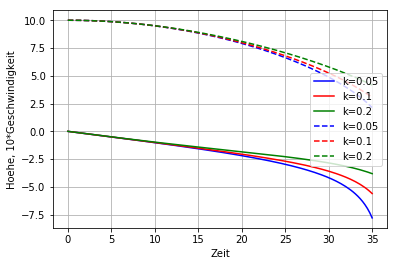

In [6]:
def dy (y, x, k):
    return [y[1],-1.0/y[0]/y[0]-k*y[1]*abs (y[1])]

x = np.linspace (0, 35, 128)
y0 = (10, 0)
y1 = odeint (dy, y0, x, args=(0.05,))
y2 = odeint (dy, y0, x, args=(0.1,))
y3 = odeint (dy, y0, x, args=(0.2,))

plt.plot (x, 10*y1[:,1], "b", label="k=0.05");
plt.plot (x, 10*y2[:,1], "r", label="k=0.1");
plt.plot (x, 10*y3[:,1], "g", label="k=0.2");

plt.plot (x, y1[:,0], "b--", label="k=0.05");
plt.plot (x, y2[:,0], "r--", label="k=0.1");
plt.plot (x, y3[:,0], "g--", label="k=0.2");

plt.xlabel ("Zeit")
plt.ylabel ("Hoehe, 10*Geschwindigkeit")
plt.legend (loc=0)
plt.grid (True)
plt.show ()